In [10]:
import numpy as np
from sklearn.datasets import make_blobs, make_classification
from modAL.models import ActiveLearner
from modAL.uncertainty import entropy_sampling
from modAL.batch import uncertainty_batch_sampling
from Models import models, plot, sampling
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# create 3D synthetic dataset to simulate single perovskite dataset
X, y = make_classification(n_samples=5000, n_features=3, n_redundant=0, n_repeated=0,\
                                   n_informative=3, n_classes=3, n_clusters_per_class=1,\
                                   weights=[0.2,0.60,0.20], class_sep = 0.5, random_state=1, flip_y = 0.1)

<IPython.core.display.Javascript object>


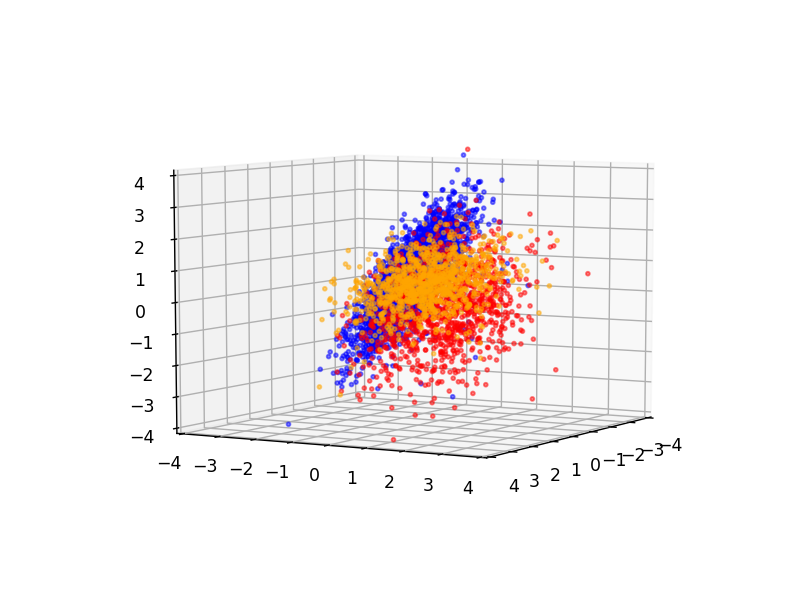

In [6]:
%matplotlib notebook
plot.plot3d(X,y,'Synthetic_data_1')

In [7]:
## Sample initial training data
# initial training data by random pick
init_idx = np.random.choice(range(len(X)), size=24) 
# An alternative initial sampling is init_idx, init_idx_test = sampling.kennardstonealgorithm(X, 24)
X_training, y_training = X[init_idx], y[init_idx]
X_test, y_test = np.delete(X, init_idx, axis=0), np.delete(y, init_idx)
print('initial training index: ', init_idx)

initial training index:  [4705  676 3302 1619 3971 3006  654 1686 1162 1964 4834 4939 3411 2327
  286 2797 2361 3086 3008  138 4707 3183 4243  206]


Estimator choices: ['SVC_rbf', 'SVC_Pearson', 'RF', 'xgboost', 'kNN', 'GPC']

In [8]:
# initializing the learners
classifier = 'GPC'
query_strategy = models.custom_query_strategy
n_queries = 200
n_instances = 1

learner = ActiveLearner(estimator= models.estimator[classifier],\
                        X_training=X_training, y_training=y_training,\
                        query_strategy = query_strategy)

# This function is used to generate learning curve for the active-learner
# In each interation of active learning, new training sets are taken from X_test 
# and moved to X_training. (X,y) are used to generate testing score. 
train_size, scores = models.actlearn_perf(learner=learner, X=X, y=y, \
                                     X_training=X_training, y_training=y_training, \
                                     X_test=X_test, y_test=y_test, n_queries=n_queries, n_instances=n_instances)

 72%|███████▏  | 143/200 [01:36<00:46,  1.23it/s]/opt/conda/lib/python3.6/site-packages/sklearn/gaussian_process/gpc.py:430: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'grad': array([-0.04255846,  0.638484  ]), 'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 92, 'nit': 15, 'warnflag': 2}
  " state: %s" % convergence_dict)
100%|██████████| 200/200 [02:24<00:00,  1.24it/s]


<IPython.core.display.Javascript object>


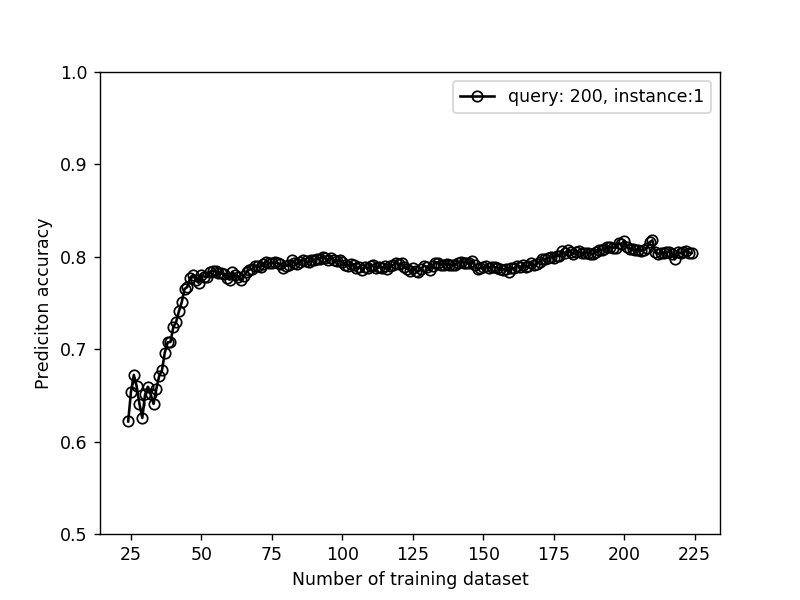

Text(0, 0.5, 'Prediciton accuracy')

In [13]:
# Plot learning curve of obove active-learner
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(train_size, scores, 'o-', c = 'black', \
        fillstyle='none', label = 'query: 200, instance:1')
ax.set_ylim(0.5,1)
ax.legend(loc='best')
ax.set_xlabel('Number of training dataset')
ax.set_ylabel('Prediciton accuracy')